# Dependências

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Carregando os dados

In [0]:
df = pd.read_csv('https://canvas.instructure.com/files/79840847/download?download_frd=1')
df.head(10)

,Cálculo1,LPT,P1,IC,Cálculo2,cra
0,8.7,10.0,9.0,9.1,8.4,8.477647
1,7.0,7.0,7.7,7.0,6.2,6.851724
2,8.6,9.8,7.9,9.6,8.7,9.090588
3,7.8,8.3,6.8,8.2,8.0,7.283516
4,5.2,9.3,5.0,8.5,5.0,7.205747
5,6.1,9.2,9.1,9.3,5.6,7.808235
6,6.3,9.6,8.3,8.6,6.7,8.858824
7,7.5,8.9,7.5,7.9,5.0,6.158824
8,6.6,9.0,5.0,7.9,5.0,6.730588
9,7.5,6.5,7.3,9.2,8.2,7.079310


# Sumário dos Dados

In [0]:
df.describe()

,Cálculo1,LPT,P1,IC,Cálculo2,cra
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,7.200000,8.480114,7.407955,8.172727,6.323864,7.332535
std,1.228493,0.984522,1.346278,0.894007,1.293662,0.849758
min,5.000000,6.200000,5.000000,5.900000,5.000000,4.874468
25%,6.275000,7.700000,6.500000,7.500000,5.100000,6.841484
50%,7.200000,8.500000,7.750000,8.200000,5.800000,7.274746
75%,8.125000,9.300000,8.325000,8.800000,7.500000,7.883292
max,9.800000,10.000000,10.000000,10.000000,9.300000,9.090588


# Partição Treino/Teste

In [0]:
x = df[['Cálculo1', 'LPT', 'P1', 'IC', 'Cálculo2']]
y = df.cra.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)



##2. Construa um gráfico de correlação mostrando as correlações entre cada variável independente com a variável dependente.

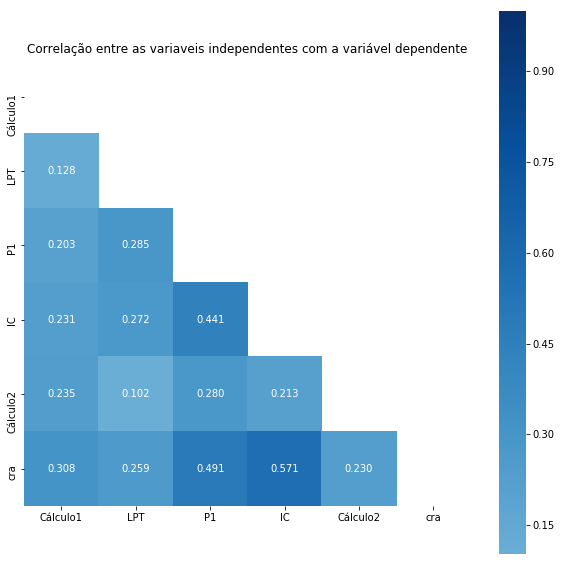

In [0]:
correlation = df.corr(method='pearson')
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots()
ax.set_title("Correlação entre as variaveis independentes com a variável dependente")
ax.figure.set_size_inches(10, 10)
sns.heatmap(correlation, ax=ax, annot=True, mask=mask, fmt='.3f', cbar=True, square=True, cmap=plt.cm.Blues, center=0.1)

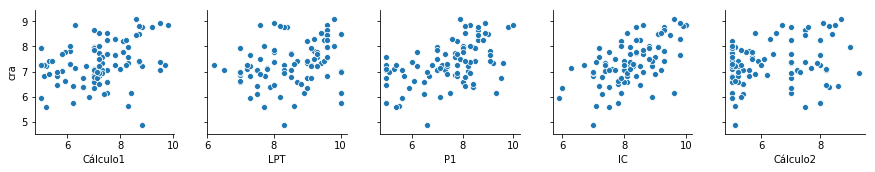

In [0]:
sns.pairplot(df, x_vars=df.columns[:-1], y_vars='cra')
plt.show()

##3. Escolha a variável melhor correlacionada e construa uma regressão simples. Meça o RMSE no treino e teste.


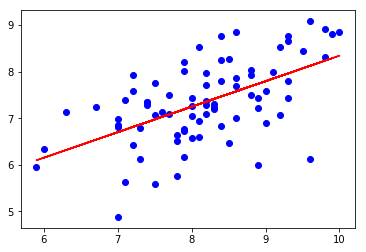

RMSE in y_test: 0.41428714967667374
RMSE in y_train: 0.7184727727075743


In [0]:
x = df[['IC']]
y = df.cra.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

regressao = LinearRegression()
regressao.fit(x_train, y_train)

prediao_test = regressao.predict(x_test)
prediao_train = regressao.predict(x_train)

plt.scatter (x_train, y_train, color = 'blue') 
plt.plot(x_train, prediao_train, color = 'red')
plt.show()

print('RMSE in y_test:', (mean_squared_error(y_test, prediao_test))**0.5)
print('RMSE in y_train:', (mean_squared_error(y_train, prediao_train))**0.5)

##4. Mesma coisa que item 3 acima mas agora com as três variáveis melhores correlacionadas.

RMSE in y_test: 0.4161371038950834
RMSE in y_train: 0.664779133413628


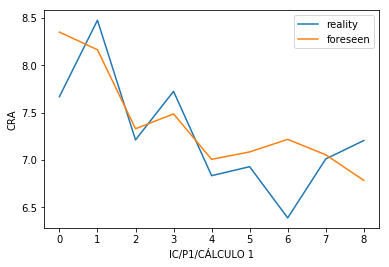

In [0]:
x = df[['Cálculo1','P1', 'IC']]
y = df.cra.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

regressao = LinearRegression()
regressao.fit(x_train, y_train)

prediao_test = regressao.predict(x_test)
prediao_train = regressao.predict(x_train)



print('RMSE in y_test:', (mean_squared_error(y_test, prediao_test))**0.5)
print('RMSE in y_train:', (mean_squared_error(y_train, prediao_train))**0.5)

plt.plot(y_test, label='reality')
plt.plot(prediao_test, label='foreseen')
plt.xlabel('IC/P1/CÁLCULO 1')
plt.ylabel('CRA')
plt.legend()

##5. Mesma coisa que os itens 3 e 4 acima mas agora com todas as variáveis.

RMSE in y_test: 0.44108516932368397
RMSE in y_train: 0.6627294390302053


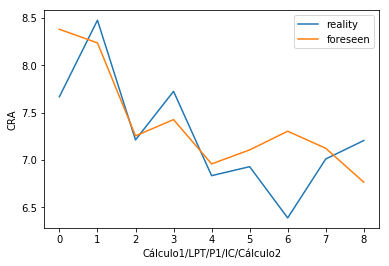

In [0]:
x = df[['Cálculo1', 'LPT', 'P1', 'IC', 'Cálculo2']]
y = df.cra.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

regressao = LinearRegression()
regressao.fit(x_train, y_train)

prediao_test = regressao.predict(x_test)
prediao_train = regressao.predict(x_train)



print('RMSE in y_test:', (mean_squared_error(y_test, prediao_test))**0.5)
print('RMSE in y_train:', (mean_squared_error(y_train, prediao_train))**0.5)

plt.plot(y_test, label='reality')
plt.plot(prediao_test, label='foreseen')
plt.xlabel('Cálculo1/LPT/P1/IC/Cálculo2')
plt.ylabel('CRA')
plt.legend()

##6. Compare todos os modelos em termos de RMSE no treino e teste. Qual o melhor modelo? Por que você acha que é o caso? 

In [0]:
print('O melhor modelo é o modelo 4')
print('RMSE in y_test: 0.4161371038950834 \nRMSE in y_train: 0.664779133413628')
print('Contém os melhores resultados de correlação')

O melhor modelo é o modelo 4
RMSE in y_test: 0.4161371038950834 
RMSE in y_train: 0.664779133413628
Contém os melhores resultados de correlação


##7. Faça 10 partições aleatórias de treino e teste.

In [0]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape,df.shape)


(79, 5) (9, 5) (79,) (9,) (88, 6)


In [0]:

result = np.array_split(df.sample(frac=1), 10)  
result

[    Cálculo1   LPT   P1   IC  Cálculo2       cra
 20       7.0   7.5  5.6  8.0       5.6  7.058621
 84       8.0   7.8  5.0  8.2       8.2  7.102247
 40       5.3   9.5  9.1  8.0       5.0  7.434831
 57       8.2   9.6  8.8  8.4       7.0  8.247059
 28       7.0   9.6  8.4  8.2       9.0  7.963218
 18       5.8  10.0  8.2  7.4       7.2  7.010588
 71       8.2   6.2  5.4  6.7       5.1  7.250575
 48       7.5   9.5  8.6  8.5       8.0  8.270588
 11       8.4  10.0  9.3  9.6       7.0  6.134513,
     Cálculo1  LPT   P1   IC  Cálculo2       cra
 49       5.9  8.0  6.2  8.4       5.7  7.796471
 39       7.5  9.4  8.1  9.2       6.5  8.530588
 23       5.6  8.0  5.0  8.5       8.2  6.467033
 9        7.5  6.5  7.3  9.2       8.2  7.079310
 64       8.1  9.3  8.0  7.5       5.5  7.761176
 3        7.8  8.3  6.8  8.2       8.0  7.283516
 66       7.1  9.1  9.5  7.9       7.0  6.763636
 61       8.7  8.7  8.1  8.9       5.2  7.442529
 34       5.0  7.3  5.6  5.9       5.0  5.959406,
     Cál

##8. Para cada partição faça:
###Calcule a média dos erros de treino e teste para os modelos criados nos itens 3, 4 e 5 acima.
###Plote um gráfico de barras mostrando esses resultados para cada modelo.

In [0]:
def getMETT(atts, partition):
  x = partition[atts]
  y = partition.cra.values
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=42)

  regressao = LinearRegression()
  regressao.fit(x_train, y_train)
  predicaotest = regressao.predict(x_test)
  predicaotrain = regressao.predict(x_train)
  
  msetest = mean_squared_error(y_test, predicaotest)
  msetrain = mean_squared_error(y_train, predicaotrain)          
  return (msetest, msetrain)

cont = 0
mett = []
for r in result:
  cont += 1
  model3 = getMETT(['IC'], r)
  model4 = getMETT(['IC', 'P1', 'Cálculo1'], r)
  model5 = getMETT(['IC', 'P1', 'Cálculo1', 'Cálculo2', 'LPT'], r)
  mett.append([model3, model4, model5])
  print("Partition", cont)
  print("Modelo 3 test:", model3[0], "- train:", model3[1] )
  print("Modelo 4 test:", model4[0], "train:", model4[1])
  print("Modelo 5 test:", model5[0], "train:", model5[1])


Partition 1
Modelo 3 test: 1.2080570952371326 - train: 0.32763257807203394
Modelo 4 test: 0.9707424027093734 train: 0.28650558560300393
Modelo 5 test: 0.4652939547201439 train: 0.2313484307501952
Partition 2
Modelo 3 test: 0.01872588410859817 - train: 0.37451641004627406
Modelo 4 test: 0.32809634934271154 train: 0.2876347819731866
Modelo 5 test: 3.166207451756696 train: 0.01506084449414985
Partition 3
Modelo 3 test: 0.007472211953092463 - train: 0.6734934291144132
Modelo 4 test: 0.37021734566004544 train: 0.25797964634924647
Modelo 5 test: 1.0966991195198197 train: 0.1488695834817737
Partition 4
Modelo 3 test: 0.05444651044693369 - train: 0.4711712760660111
Modelo 4 test: 0.007073795961375009 train: 0.0972157347158031
Modelo 5 test: 0.006998963910134398 train: 0.09344791750532691
Partition 5
Modelo 3 test: 3.234859291135256 - train: 0.2785291698184648
Modelo 4 test: 4.035163054768565 train: 0.14836925605430049
Modelo 5 test: 1.2281208472069578 train: 0.004155485398774278
Partition 6
Mo

UNIDADE 1


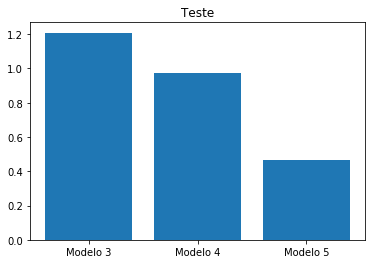

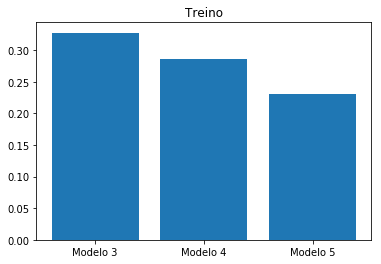

UNIDADE 2


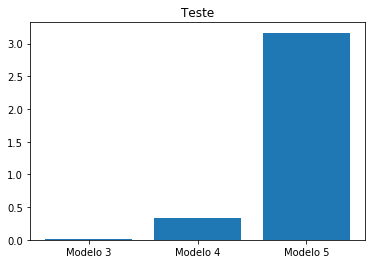

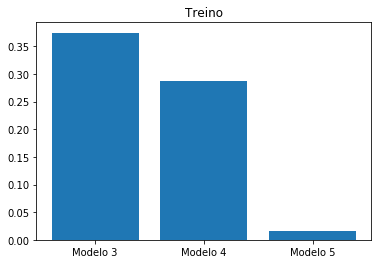

UNIDADE 3


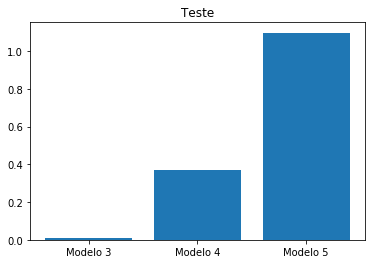

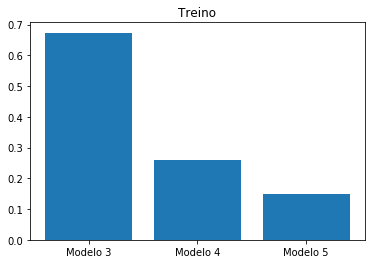

UNIDADE 4


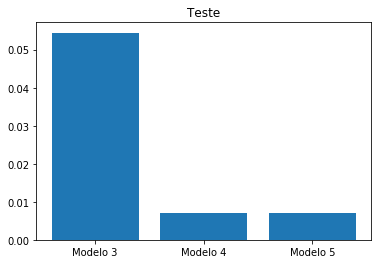

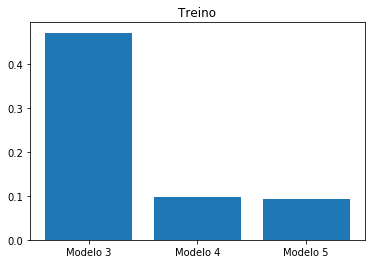

UNIDADE 5


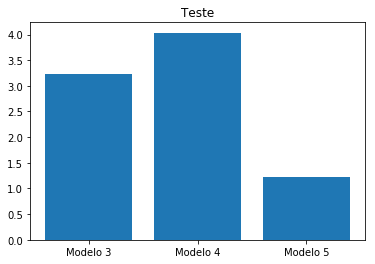

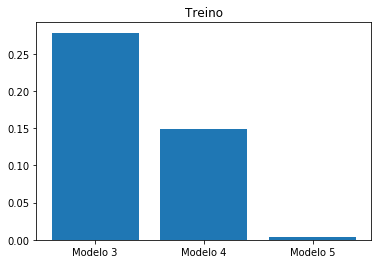

UNIDADE 6


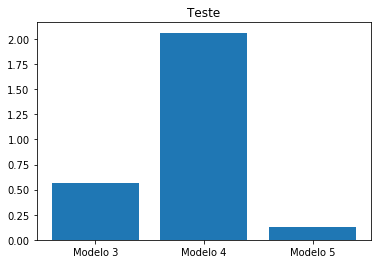

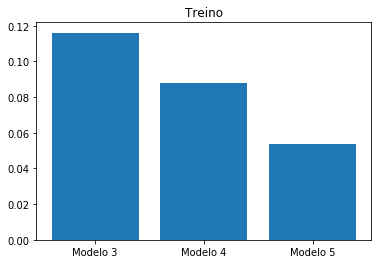

UNIDADE 7


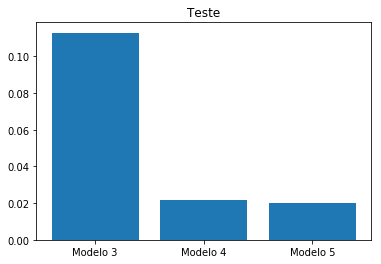

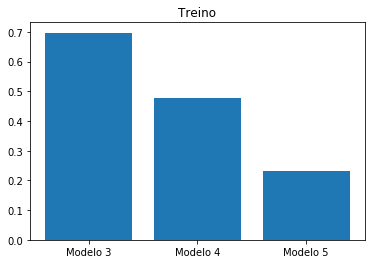

UNIDADE 8


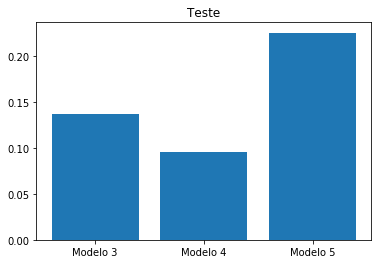

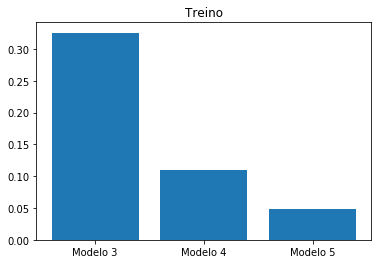

UNIDADE 9


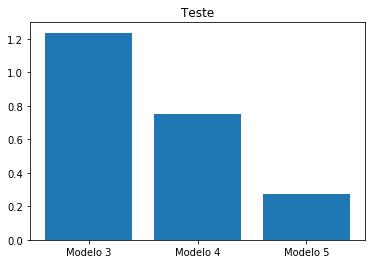

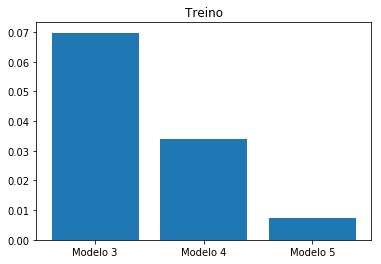

UNIDADE 10


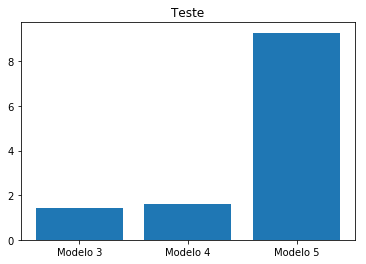

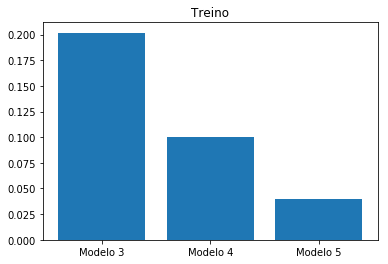

In [0]:
cont = 0
for element in mett:
  cont += 1
  print('UNIDADE', cont)
  
  plt.bar(['Modelo 3', 'Modelo 4', 'Modelo 5'], [element[0][0], element[1][0], element[2][0]])
  plt.title('Teste')
  plt.show()

  plt.bar(['Modelo 3', 'Modelo 4', 'Modelo 5'], [element[0][1], element[1][1], element[2][1]])
  plt.title('Treino')
  plt.show()
